# Stacked AutoEncoders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/home/alvaro/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
tf.reset_default_graph()

In [12]:
# 784 pixels per picture
# 392
# 196
# 392
# 784

num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [13]:
learning_rate = 0.01

actf = tf.nn.relu

In [14]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [15]:
# initialize the parameters by adapting its scale to the shape of weight tensors.
initializer = tf.variance_scaling_initializer()

In [16]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

In [17]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [18]:
act_func = tf.nn.relu

In [19]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = act_func(tf.matmul(hid_layer3, w4) + b4)

In [20]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [22]:
train = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()

In [24]:
saver = tf.train.Saver()

In [25]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:X_batch})
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("Epoch: {} Loss: {}".format(epoch, training_loss))
        
    saver.save(sess, './example_stacked_autoencoder.ckpt')

Epoch: 0 Loss: 0.03339485451579094
Epoch: 1 Loss: 0.032989539206027985
Epoch: 2 Loss: 0.0293726846575737
Epoch: 3 Loss: 0.03304269537329674
Epoch: 4 Loss: 0.030013447627425194


In [27]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess, './example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


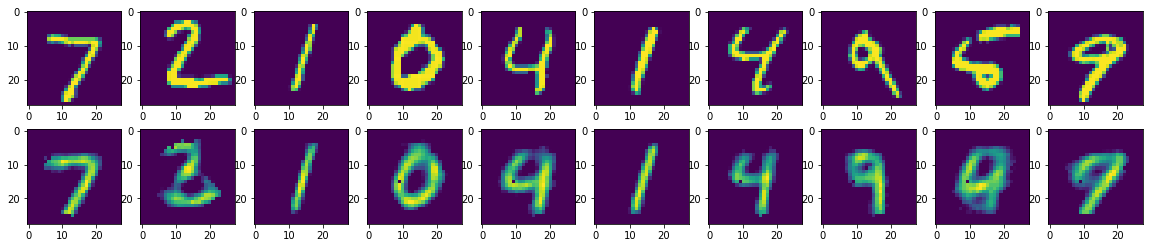

In [28]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i], (28,28)))